In [49]:
#cd CSV\ files

In [116]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import json
from datetime import datetime

# Data Cleaning

In [51]:
df = pd.read_csv("combined_movie_data.csv")

In [52]:
df['movie_year'] = df.release_date_x.str[:4]
df.head()

,Unnamed: 0,titleId,start_year,genres,ordering,title,region,genre_ids,id_x,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,movie_year
0,0,tt0069049,2018.0,Drama,3.0,The Other Side of the Wind,US,"[35, 18]",299782,9.800,2018-11-02,7.0,64,NaN,NaN,NaN,NaN,NaN,2018
1,1,tt0112502,2017.0,"Horror,Thriller",3.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
2,2,tt4503112,2018.0,"Action,Horror",3.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
3,3,tt9181914,2018.0,"Animation,Family",5.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
4,4,tt0192528,2018.0,Drama,1.0,Heaven & Hell,US,[18],567662,0.600,2018-11-06,7.5,2,NaN,NaN,NaN,NaN,NaN,2018


In [53]:
df.drop(df.loc[df['domestic_gross']=='$0'].index, inplace=True)

In [54]:
df1 = df.drop(['Unnamed: 0', 'start_year','titleId','worldwide_gross','genre_ids', 'id_x', 'worldwide_gross','id_y','ordering'], axis=1, inplace=False)

In [55]:
df2 = df1.dropna(axis = 0, subset = ['production_budget', 'domestic_gross'], inplace = False)
df2

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year
22,no genre,The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015","$200,000","$1,109,808",2015
23,"Comedy,Mystery",The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015","$200,000","$1,109,808",2015
26,"Adventure,Drama,Romance",On the Road,US,8.919,2012-12-21,5.6,518,"Mar 22, 2013","$25,000,000","$720,828",2012
27,Horror,Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014","$3,300,000","$13,092,006",2013
28,"Drama,Music",Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014","$3,300,000","$13,092,006",2013
...,...,...,...,...,...,...,...,...,...,...,...
26098,no genre,Man on Fire,NaN,1.790,2018-01-24,8.0,1,"Apr 23, 2004","$60,000,000","$77,906,816",2018
26200,no genre,Spawn,NaN,1.400,2018-04-13,10.0,1,"Jul 31, 1997","$40,000,000","$54,979,992",2018
26317,no genre,Enough,NaN,0.719,2018-03-22,8.7,3,"May 24, 2002","$38,000,000","$39,177,215",2018
26457,no genre,Undiscovered,NaN,0.600,2018-04-07,8.0,1,"Aug 26, 2005","$9,000,000","$1,069,318",2018


In [56]:
df2['domestic_gross'] = df2['domestic_gross'].str.replace('$', '')
df2['domestic_gross'] = df2['domestic_gross'].str.replace(',', '')

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
df2['production_budget'] = df2['production_budget'].str.replace('$', '')
df2['production_budget'] = df2['production_budget'].str.replace(',', '')

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
df2['domestic_gross'] = pd.to_numeric(df2['domestic_gross'],errors='coerce')
df2['production_budget'] = pd.to_numeric(df2['production_budget'],errors='coerce')
#df2.loc[:,'domestic_gross'] = pd.to_numeric(df2.loc['domestic_gross'],errors='coerce')

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
df2["net"] = df2['domestic_gross'] - df2['production_budget'] 

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df2.drop(df2.loc[df2['genres']=='no genre'].index, inplace=True)

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
df2['ROI'] = (df2['net']/df2['domestic_gross'])*100

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df2['ROI'].apply(np.ceil)

23         82.0
26      -3368.0
27         75.0
28         75.0
29         75.0
          ...  
15926    -475.0
16018      78.0
16202      22.0
16260      86.0
16261      86.0
Name: ROI, Length: 2620, dtype: float64

In [63]:
final_df = df2.drop_duplicates(subset=['title'])

In [64]:
final_df.drop(['release_date_x','movie_year'], axis=1, inplace=True)

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
final_df['release_date'] = final_df.release_date_y.apply(lambda x: pd.to_datetime(x).strftime('%m%d%Y'))

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
final_df.dtypes

genres                object
title                 object
region                object
popularity           float64
vote_average         float64
vote_count             int64
release_date_y        object
production_budget      int64
domestic_gross         int64
net                    int64
ROI                  float64
release_date          object
dtype: object

In [67]:
final_df['release_date'] = pd.to_datetime(final_df['release_date'], format='%m%d%Y')

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
final_df['month'] = pd.DatetimeIndex(final_df['release_date']).month
final_df.head(2)

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,genres,title,region,popularity,vote_average,vote_count,release_date_y,production_budget,domestic_gross,net,ROI,release_date,month
23,"Comedy,Mystery",The Overnight,US,6.576,6.0,200,"Jun 19, 2015",200000,1109808,909808,81.978865,2015-06-19,6
26,"Adventure,Drama,Romance",On the Road,US,8.919,5.6,518,"Mar 22, 2013",25000000,720828,-24279172,-3368.233753,2013-03-22,3


In [69]:
conditions = [
    (final_df['month'] == 12)| (final_df['month'] == 1)| (final_df['month'] == 2),
    (final_df['month'] == 3) | (final_df['month'] == 4)| (final_df['month'] == 5),
    (final_df['month'] == 6) | (final_df['month'] == 7)| (final_df['month'] == 8),
    (final_df['month'] == 9) | (final_df['month'] == 10)| (final_df['month'] == 11)
    ]
# create a list of the values we want to assign for each condition
values = ['winter', 'spring', 'summer', 'fall']
# create a new column and use np.select to assign values to it using our lists as arguments
final_df['season'] = np.select(conditions, values)
# display updated DataFrame
final_df.tail()

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,genres,title,region,popularity,vote_average,vote_count,release_date_y,production_budget,domestic_gross,net,ROI,release_date,month,season
15870,"Action,Crime,Drama",War,US,0.600,6.0,1,"Aug 24, 2007",25000000,22486409,-2513591,-11.178268,2007-08-24,8,summer
15923,Drama,Teeth,US,1.000,7.6,5,"Jan 18, 2008",2000000,347578,-1652422,-475.410411,2008-01-18,1,winter
16018,"Drama,Horror,Mystery",Hereditary,US,26.185,7.0,2491,"Jun 8, 2018",10000000,44069456,34069456,77.308547,2018-06-08,6,summer
16202,Documentary,Fahrenheit 11/9,US,10.003,7.1,142,"Sep 21, 2018",5000000,6352306,1352306,21.288427,2018-09-21,9,fall
16260,"Comedy,Drama,Family",Monster,US,0.600,5.0,1,"Dec 24, 2003",5000000,34469210,29469210,85.494301,2003-12-24,12,winter


In [70]:
final_df.dtypes

genres                       object
title                        object
region                       object
popularity                  float64
vote_average                float64
vote_count                    int64
release_date_y               object
production_budget             int64
domestic_gross                int64
net                           int64
ROI                         float64
release_date         datetime64[ns]
month                         int64
season                       object
dtype: object

In [71]:
final_df = final_df.drop(['release_date_y'], axis=1, inplace=False)

# Visualizing our Data

With our data clean, we can now begin to develop visuals that will help us see trends. First I want to take all the quantitative data in our dataframe and see which variables have have a relationship. For this, we created a correlation heatmap.

Text(0.5, 1, 'Correlation Heatmap')

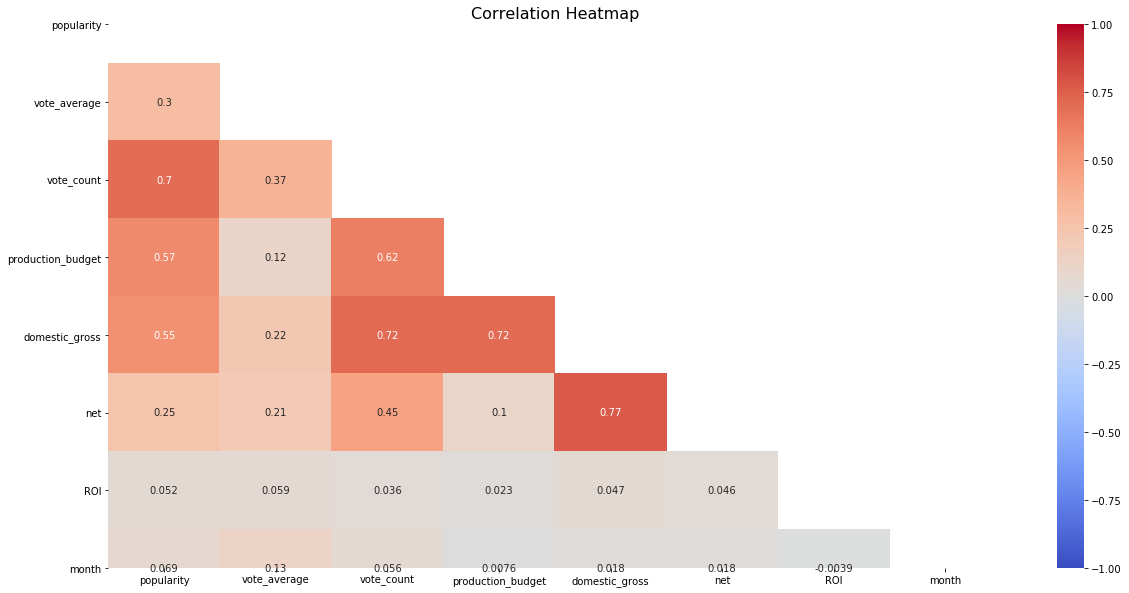

In [72]:
plt.figure(figsize=(20, 10))
matrix = np.triu(final_df.corr())
sn.heatmap(final_df.corr(), annot = True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Correlation Heatmap', fontsize=16)

This map has our quantitative data. On the right hand side there is a meter ranging from -1(Blue) to 1(Red). The closer to 1 the numbers are, the stronger the relationship of the two variables. Additionally, the closer to the blue they are, the less likely there will be a relationship of the two variables. For instance if we look at the variables of domestic_gross and net we see a strong correlation of .77. We know that this is a positive relationship because we need the domestic_gross variable to calculate the net variable. As the domestic_gross goes up, so does the net variable. As few obvious observations that can be made here are:

       - Production_budget and domestic gross have a positive strong relationship. 
       - Domestic gross and the amount of votes given in ratings have a strong correlation to one another

Observations that we should investigate more are
       
       - Relationship between production_budget and popularity
       - Domestic gross and popularity
        

Let's explore the relationship between Production Budget and Domestic Gross.

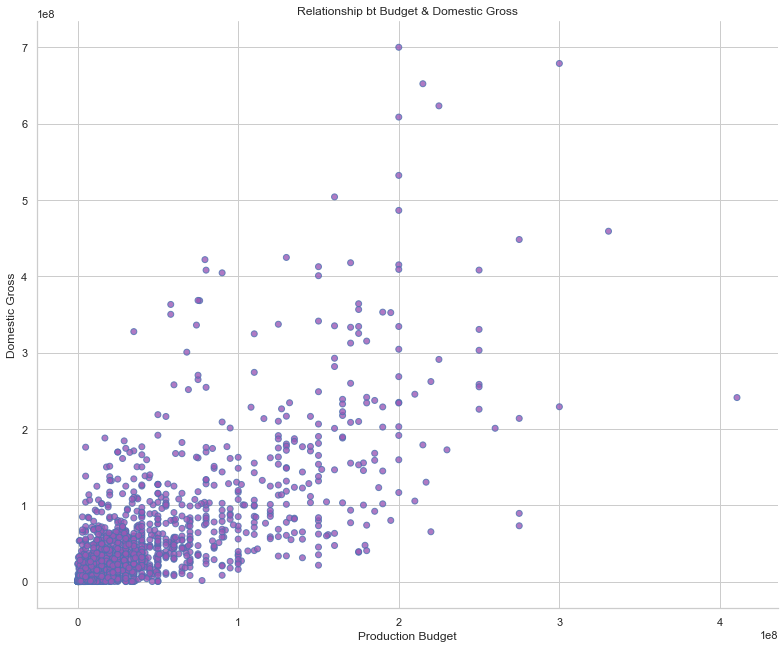

In [199]:
value=(final_df['production_budget']> 0) & (final_df['domestic_gross']>0)
final_df['color'] = np.where( value==True , "#9b59b6", "#3498db")

g = sn.lmplot('production_budget','domestic_gross', 
              data = final_df, 
              fit_reg= False, 
              scatter_kws={'facecolors':final_df['color']},)


fig = plt.gcf()
fig.set_size_inches( 12, 10)
# g.set(xscale="log")
sn.set_style("whitegrid")
g.set_axis_labels("Production Budget","Domestic Gross")
# set(xlim=(0,50), ylim=(0,100))
plt.title("Relationship bt Budget & Domestic Gross")
plt.show(g)

Explanation of above graph

In [189]:
seasons = list(final_df.season.unique())
seasons

['summer', 'spring', 'fall', 'winter']

In [188]:
num_per_season = final_df.groupby('season')['title'].count()
num_per_season

season
fall      413
spring    359
summer    376
winter    333
Name: title, dtype: int64

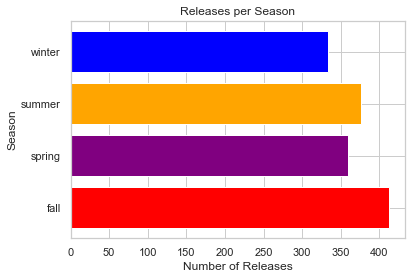

In [200]:
height = (num_per_season)
bars = (['fall', 'spring', 'summer', 'winter'])
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height,color=['red', 'purple', 'orange', 'blue'])
fig.set_size_inches(10, 10) 

# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.xlabel("Number of Releases")
plt.ylabel("Season")
plt.title("Releases per Season")

# Show graphic
plt.show()


In [75]:
final_df.describe()

,popularity,vote_average,vote_count,production_budget,domestic_gross,net,ROI,month
count,1481.000000,1481.000000,1481.000000,1.481000e+03,1.481000e+03,1.481000e+03,1.481000e+03,1481.000000
mean,12.042804,6.278123,1973.209993,4.449536e+07,5.715617e+07,1.266081e+07,-6.907214e+03,6.773801
std,8.123598,0.992251,2797.992535,5.436434e+07,8.434149e+07,5.913659e+07,9.984564e+04,3.404411
min,0.600000,0.000000,1.000000,9.000000e+03,5.280000e+02,-2.019413e+08,-3.267874e+06,1.000000
25%,7.510000,5.800000,245.000000,9.000000e+06,5.790894e+06,-1.081181e+07,-1.487813e+02,4.000000
50%,10.613000,6.300000,918.000000,2.500000e+07,2.884869e+07,-3.636800e+04,-1.213987e+00,7.000000
75%,15.351000,6.900000,2494.000000,5.500000e+07,6.774533e+07,2.305991e+07,5.192323e+01,10.000000
max,80.773000,10.000000,22186.000000,4.106000e+08,7.000596e+08,5.000596e+08,9.956072e+01,12.000000


In [76]:
final_df['production_budget'].median()

25000000.0

In [77]:
final_df['popularity'].mean()

12.042804186360566

In [81]:
#Time of Year and Net

In [82]:
final_df['net'].median()

-36368.0

In [83]:
#Genre and ROI

In [84]:
final_df['ROI'].median()

-1.2139865815123516

In [85]:
time_of_year = final_df.groupby('season')['domestic_gross'].mean()
time_of_year.head()

season
fall      4.451377e+07
spring    6.054603e+07
summer    6.901661e+07
winter    5.578928e+07
Name: domestic_gross, dtype: float64

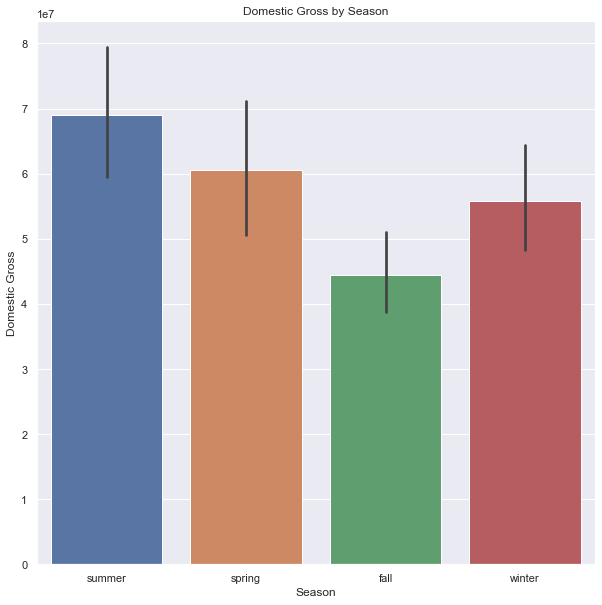

In [109]:
sn.barplot(x = 'season',
            y = 'domestic_gross',
            data = final_df,
            
            )
# Show the plot
sn.set(rc={'figure.figsize':(12,12)})
plt.xlabel("Season")
plt.ylabel("Domestic Gross")
plt.title("Domestic Gross by Season")
plt.show()